<a href="https://colab.research.google.com/github/surayaqis/DataScience-Project-II/blob/main/STQD6014_Project_II_P166248_SFO_Air_Cargo_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STQD6014 Project II - SFO Air Cargo Analysis

## 1.0 Introduction

San Francisco International Airport (IATA: SFO, ICAO: KSFO), commonly known as San Francisco Airport, is a major gateway for both passenger and cargo traffic in the United States. In 2024, SFO ranked 13th among the busiest U.S. airports by enplanements and 27th in terms of cargo weight landed, recording a 1.96% increase from 2023 (Federal Aviation Administration, 2025). Classified as a Large Hub Airport, SFO handles 1% or more of annual U.S. commercial enplanements, indicating its importance in national and international aviation networks.

This study focuses on analyzing cargo traffic volumes at SFO, which is transported via passenger or commercial aircraft as well as dedicated freighters. By examining cargo traffic patterns, stakeholders can uncover seasonal fluctuations, identify operational inefficiencies, and anticipate external shocks such as economic downturns or pandemics. These insights support strategic resource allocation, enabling airport authorities, airlines, and logistics partners to strengthen forecasting accuracy, optimize cargo handling capacity, and enhance supply chain resilience.

A deeper understanding of SFO's cargo operations reinforces its role as critical hub in global trade. It ensures that the airport continues to connect business, markets and supply chains across the world.

## 2.0 Problem Statement

The objective is to analyze air traffic cargo statistics at SFO in order to:

*   Identify seasonal trends from 2015 to 2025 and YoY analysis
*   Compare cargo volumes across airlines, regions/route, and aircraft types to uncover operational inefficiencies or competitive advantages.
*   Provide recommendations for airport authorities, airlines, and logistics stakeholders to optimize cargo handling capacity.

These can enhance airport resource allocation, airline scheduling, and supply chain resilience, ultimately supporting more efficient global trade through SFO.

## 3.0 Data Pre-processing / Exploratory Data Analysis (EDA)

### 3.1 Data Sources

1.  **Air Traffic Cargo**: https://catalog.data.gov/dataset/air-traffic-cargo-statistics/resource/125ff040-5627-4a43-b629-4d13bd357758
2.  **IATA Airline Code**: https://en.wikipedia.org/wiki/List_of_airline_codes

### 3.2 Import Libraries

Import the necessary Python libraries for data manipulation, and visualization

In [75]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 3.3 Load Cargo Dataset

The primary cargo traffic data is loaded from the San Francisco Open Data portal. Its initial structure, data types are inspected and missing values or inconsistencies are checked and handled for further analysis

In [76]:
url_cargo = "https://data.sfgov.org/api/views/u397-j8nr/rows.csv?accessType=DOWNLOAD"
df_cargo = pd.read_csv(url_cargo)

print("First 5 rows of df_cargo (Structure Data):")
display(df_cargo.head())
print("\ndf_cargo Info (Data Types and Non-Null Counts) before cleaning:")
df_cargo.info()
print("\ndf_cargo missing values before cleaning:")
print(df_cargo.isnull().sum())

First 5 rows of df_cargo (Structure Data):


,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173,2025/12/20 02:00:06 PM,2025/12/22 03:03:31 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561,2025/12/20 02:00:06 PM,2025/12/22 03:03:31 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520,2025/12/20 02:00:06 PM,2025/12/22 03:03:31 PM
3,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394,2025/12/20 02:00:06 PM,2025/12/22 03:03:31 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810,2025/12/20 02:00:06 PM,2025/12/22 03:03:31 PM



df_cargo Info (Data Types and Non-Null Counts) before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58016 entries, 0 to 58015
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              58016 non-null  int64  
 1   Activity Period Start Date   58016 non-null  object 
 2   Operating Airline            58016 non-null  object 
 3   Operating Airline IATA Code  57437 non-null  object 
 4   Published Airline            58016 non-null  object 
 5   Published Airline IATA Code  57437 non-null  object 
 6   GEO Summary                  58016 non-null  object 
 7   GEO Region                   58016 non-null  object 
 8   Activity Type Code           58016 non-null  object 
 9   Cargo Type Code              58016 non-null  object 
 10  Cargo Aircraft Type          58016 non-null  object 
 11  Cargo Weight LBS             58016 non-null  int64  
 12  Cargo Met

### 3.4 Initial Data Cleaning

In this step, initial data cleaning is performed by dropping irrelevant columns and converting the 'Activity Period Start Date' to a datetime object, renaming it to 'Date'. The dataset is filtered to include data from 2015 onwards, as earlier data might not be relevant for recent trend analysis. Missing values are identified as well.

In [77]:
# Drop specified columns that are redundant or not needed for analysis
columns_to_drop = ["Activity Period", "Cargo Weight LBS", "data_as_of", "data_loaded_at", "Published Airline", "Published Airline IATA Code"]
df_cargo = df_cargo.drop(columns=columns_to_drop, errors='ignore')
print(f"Dropped columns: {columns_to_drop}")

# Convert 'Activity Period Start Date' to datetime and rename to 'Date'
df_cargo["Activity Period Start Date"] = pd.to_datetime(df_cargo["Activity Period Start Date"])
df_cargo.columns = df_cargo.columns.str.replace("Activity Period Start Date", "Date")

# Check min and max of 'Date'
min_date = df_cargo["Date"].min()
max_date = df_cargo["Date"].max()
print(f"\nEarliest 'Date': {min_date}")
print(f"Latest 'Date': {max_date}")

# Filter data from Year 2015 onwards
start_date_2015 = pd.to_datetime('2015-01-01')
df_cargo = df_cargo[df_cargo["Date"] >= start_date_2015].copy()
print("\nFiltered df_cargo to include data from Year 2015 onwards. Data before Year 2015 are removed")

print("\nMissing values in 'Cargo' after initial cleaning:")
print(df_cargo.isnull().sum())

# Identify airlines with missing IATA codes
airlines_with_missing_iata = df_cargo[df_cargo['Operating Airline IATA Code'].isnull()]['Operating Airline'].unique()
print("\nAirlines with missing IATA Codes before merge:")
for airline in airlines_with_missing_iata:
    print(f"- {airline}")

Dropped columns: ['Activity Period', 'Cargo Weight LBS', 'data_as_of', 'data_loaded_at', 'Published Airline', 'Published Airline IATA Code']

Earliest 'Date': 1999-07-01 00:00:00
Latest 'Date': 2025-10-01 00:00:00

Filtered df_cargo to include data from Year 2015 onwards. Data before Year 2015 are removed

Missing values in 'Cargo' after initial cleaning:
Date                            0
Operating Airline               0
Operating Airline IATA Code    59
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Cargo Type Code                 0
Cargo Aircraft Type             0
Cargo Metric TONS               0
dtype: int64

Airlines with missing IATA Codes before merge:
- Swissport USA
- Total Airport Services, Inc. (Inactive)
- Air Italy S.P.A
- El Al Israel Airlines LTD.
- Norwegian Air Shuttle ASA


### 3.5 Airline IATA Code and Name Standardization

The IATA or ICAO Airline codes are essential among stakeholders to differentiate the airlines. Thus, to enrich our cargo data, IATA airline codes are imported from Wikipedia as this is publicly available.  Then, airline names are standardized in both datasets to facilitate an accurate merge. This step involves cleaning names by removing extra characters and converting them to lowercase for consistent matching.

In [78]:
# Load IATA Airline Codes from Wikipedia
import io
url_codes = "https://en.wikipedia.org/wiki/List_of_airline_codes"
headers = {"User-Agent": "Mozilla/5.0"}  # mimic browser
response = requests.get(url_codes, headers=headers)
response.raise_for_status()

# Extract table from Wikipedia
tables = pd.read_html(io.StringIO(response.text))   # Wrap response.text in io.StringIO
iata_codes = tables[0][['IATA', 'Airline', 'Country/Region']].copy()   # main airline codes table

# Standardize airline names in the reference dataset
iata_codes["Airline"] = iata_codes["Airline"].str.strip().str.lower()
print("New DataFrame 'iata_codes' created with 'IATA', 'Airline' and 'Country/Region' columns.")
print(iata_codes.head())

# Standardize airline names in the cargo dataset
df_cargo["Operating Airline"] = df_cargo["Operating Airline"].str.strip().str.lower()

# Apply name standardization for known mismatches
# Some airlines appear with extended suffixes (e.g., "S.P.A", "Ltd.", "Asa").
# Replace them with simplified names to match the reference dataset for better merging.
# This list will be updated if there's mismatch
name_standardization_map = {
    'air italy s.p.a': 'air italy',
    'el al israel airlines ltd.': 'el al israel airlines',
    'norwegian air shuttle asa': 'norwegian air shuttle',
    'aeroflot russian international airlines' : 'aeroflot',
    'aer lingus, ltd.': 'aer lingus',
    'all nippon company airways, ltd.': 'all nippon airways',
    'china eastern': 'china eastern airlines',
    'china southern': 'china southern airlines',
    'federal express': 'fedex express',
    'klm royal dutch airlines': 'klm',
    'korean air lines': 'korean air',
    'lufthansa german airlines': 'lufthansa',
    'sas airlines': 'scandinavian airlines',
    'swiss international': 'swiss international air lines',
    'taca international airlines, s.a.': 'taca airlines',
    'atlas air, inc': 'atlas air',
    'copa airlines, inc.': 'copa airlines',
    'air pacific limited dba fiji airways': 'fiji airways',
    'hong kong airlines limited': 'hong kong airlines',
    'icelandair ehf': 'icelandair',
    'norwegian air uk ltd': 'norwegian air uk',
    'tap air portugal': 'tap portugal',
    'air transport international, inc.': 'air transport international',
    'vietnam airlines jsc': 'vietnam airlines',
    'condor flugdienst gmbh': 'condor',
    'zipair tokyo inc': 'zipair tokyo',
    'norse atlantic uk, ltd.': 'norse atlantic airways',
    'starlux airlines co. ltd': 'starlux airlines',
    'envoy air, inc.': 'envoy air',
    'air premia, inc.': 'air premia',
    'air incheon co., ltd': 'air incheon',
    'alaska airlines': 'alaska airlines, inc.',
    'eva airways': 'eva air',
    'qantas airways': 'qantas'
}
df_cargo['Operating Airline'] = df_cargo['Operating Airline'].replace(name_standardization_map)

# Merge cargo dataset with airline codes reference table
df_merged = pd.merge(
    df_cargo,
    iata_codes[["IATA","Airline", "Country/Region"]],
    left_on="Operating Airline",
    right_on="Airline",
    how="left"
)

print("\nSample 5 rows of df_merged after initial merge:")
display(df_merged.sample(5))

New DataFrame 'iata_codes' created with 'IATA', 'Airline' and 'Country/Region' columns.
  IATA                                        Airline Country/Region
0   PR                                            2go    Philippines
1  NaN        34 squadron, royal australian air force            NaN
2  NaN                                    135 airways  United States
3   1A                          amadeus it group s.a.         Global
4   1B  sabre travel network asia-pacific (ex-abacus)           APAC

Sample 5 rows of df_merged after initial merge:


,Date,Operating Airline,Operating Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS,IATA,Airline,Country/Region
11375,2019-12-01,united airlines,UA,International,Europe,Deplaned,Mail,Passenger,184.869216,UA,united airlines,United States
1868,2015-11-01,eva air,BR,International,Asia,Enplaned,Express,Passenger,0.698998,BR,eva air,Taiwan
16706,2022-08-01,korean air,KE,International,Asia,Enplaned,Cargo,Passenger,57.898411,KE,korean air,South Korea
20770,2024-09-01,klm,KL,International,Europe,Deplaned,Cargo,Passenger,388.838167,KL,klm,Netherlands
8322,2018-09-01,swiss international air lines,LX,International,Europe,Enplaned,Cargo,Passenger,221.105052,LX,swiss international air lines,Switzerland


### 3.6 Final Data Cleaning and Transformation

There are Airlines with missing "Operating Airline IATA Code". Hence, the airlines with missing "Operating Airline IATA Code" are filled with the merged "IATA" data. Then, rows that are still missing IATA codes are dropped, assuming that they are not active or they are ground handlers.

Columns are renamed for clarity, `Cargo Metric TONS` is rounded, and `Activity Type` values are mapped to 'Import' and 'Export' for consistency.

In [79]:
# Handle Missing IATA Codes
initial_missing_iata_count = df_merged['Operating Airline IATA Code'].isnull().sum()
print(f"Initial missing 'Operating Airline IATA Code' values: {initial_missing_iata_count}")

# Fill missing IATA codes using values from the 'IATA' column (from reference dataset)
df_merged['Operating Airline IATA Code'] = df_merged['Operating Airline IATA Code'].fillna(df_merged['IATA'])

# Identify airlines with missing IATA codes
airlines_with_missing_iata = df_merged[df_merged['Operating Airline IATA Code'].isnull()]['Operating Airline'].unique()
print("\nAirlines with missing IATA Codes after merge:")
for airline in airlines_with_missing_iata:
    print(f"- {airline}")

Initial missing 'Operating Airline IATA Code' values: 59

Airlines with missing IATA Codes after merge:
- swissport usa
- total airport services, inc. (inactive)


In [80]:
# Drop rows that still have missing IATA codes (these are typically ground handlers or inactive entities)
df_merged = df_merged.dropna(subset=['Operating Airline IATA Code'])
print("\nRows with missing IATA codes have been removed.")

# Verify completeness (should be zero missing values now)
missing_after_fill = df_merged['Operating Airline IATA Code'].isnull().sum()
print(f"Number of missing 'Operating Airline IATA Code' values after cleaning: {missing_after_fill}")

# Identify airlines with missing countries
airlines_with_country = df_merged[df_merged['Country/Region'].isnull()]['Operating Airline'].unique()
print("\nAirlines with missing Country after merge:")
for airline in airlines_with_country:
    print(f"- {airline}")

# Fill missing 'Country/Region' values with 'NA'
df_merged['Country/Region'] = df_merged['Country/Region'].fillna('NA')
print("Missing 'Country/Region' values have been filled with 'NA'.")

# Drop unnecessary columns: IATA and Airline (from reference merge)
df_merged = df_merged.drop(columns=["IATA", "Airline"], errors="ignore")

# Transform Operating Airline names to uppercase for consistency
df_merged["Operating Airline"] = df_merged["Operating Airline"].str.upper()
df_merged['Cargo Metric TONS'] = df_merged['Cargo Metric TONS'].round(2)

# Rename column names for better readability
df_merged = df_merged.rename(columns={
    "Operating Airline": "Airline",
    "Operating Airline IATA Code": "IATA Code",
    "GEO Region": "Region",
    "Activity Type Code": "Activity Type",
    "Country/Region": "Country",
})

df_merged['Airline'] = df_merged['Airline'] + ", " + df_merged['IATA Code']

# Replace values in 'Activity Type' column for clarity
df_merged['Activity Type'] = df_merged['Activity Type'].replace({
    'Deplaned': 'Import',
    'Enplaned': 'Export'
})

print("\n--- Final Cleaned Dataset Preview ---")
display(df_merged.head())
print("\nUnique values in 'Activity Type' column after mapping:")
print(df_merged['Activity Type'].unique())
print(f"\nFinal dataset shape: {df_merged.shape}")


Rows with missing IATA codes have been removed.
Number of missing 'Operating Airline IATA Code' values after cleaning: 0

Airlines with missing Country after merge:
- taca airlines
- redding aero enterprises
- iberia
- 21 air, llc
Missing 'Country/Region' values have been filled with 'NA'.

--- Final Cleaned Dataset Preview ---


,Date,Airline,IATA Code,GEO Summary,Region,Activity Type,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS,Country
0,2015-01-01,"ABX AIR, GB",GB,Domestic,US,Import,Cargo,Freighter,1180.62,United States
1,2015-01-01,"ABX AIR, GB",GB,Domestic,US,Export,Cargo,Freighter,727.50,United States
2,2015-01-01,"AER LINGUS, EI",EI,International,Europe,Import,Cargo,Passenger,81.01,Ireland
3,2015-01-01,"AER LINGUS, EI",EI,International,Europe,Export,Cargo,Passenger,81.74,Ireland
4,2015-01-01,"AIR CANADA, AC",AC,International,Canada,Import,Cargo,Passenger,29.70,Canada



Unique values in 'Activity Type' column after mapping:
['Import' 'Export']

Final dataset shape: (22980, 10)


## 4.0 Visualizations

This section presents key visualizations to explore cargo traffic patterns at SFO. Cargo distribution are analyzed by geographic summary, aircraft type, and activity type.

Air travel is highly seasonal in nature. Comparisons to analyze whether air traffic is increasing or declining should be done between the same period in different years, such as January 2010 to January 2009.  Comparisons of different periods in the same year (such as October 2009 to November 2009) are meaningful only to analyze seasonal trends. Other factors such as holidays (e.g., spring holidays vary during the March-April period) may also need to be taken into account in any comparative analysis.
Ref: https://www.flysfo.com/about/media/facts-statistics/air-traffic-statistics

### 4.1 Overall Cargo Distribution

These pie charts provide an overview of cargo weight distribution across different categories for the period 2015-2025. They highlight the airport's primary cargo segments.


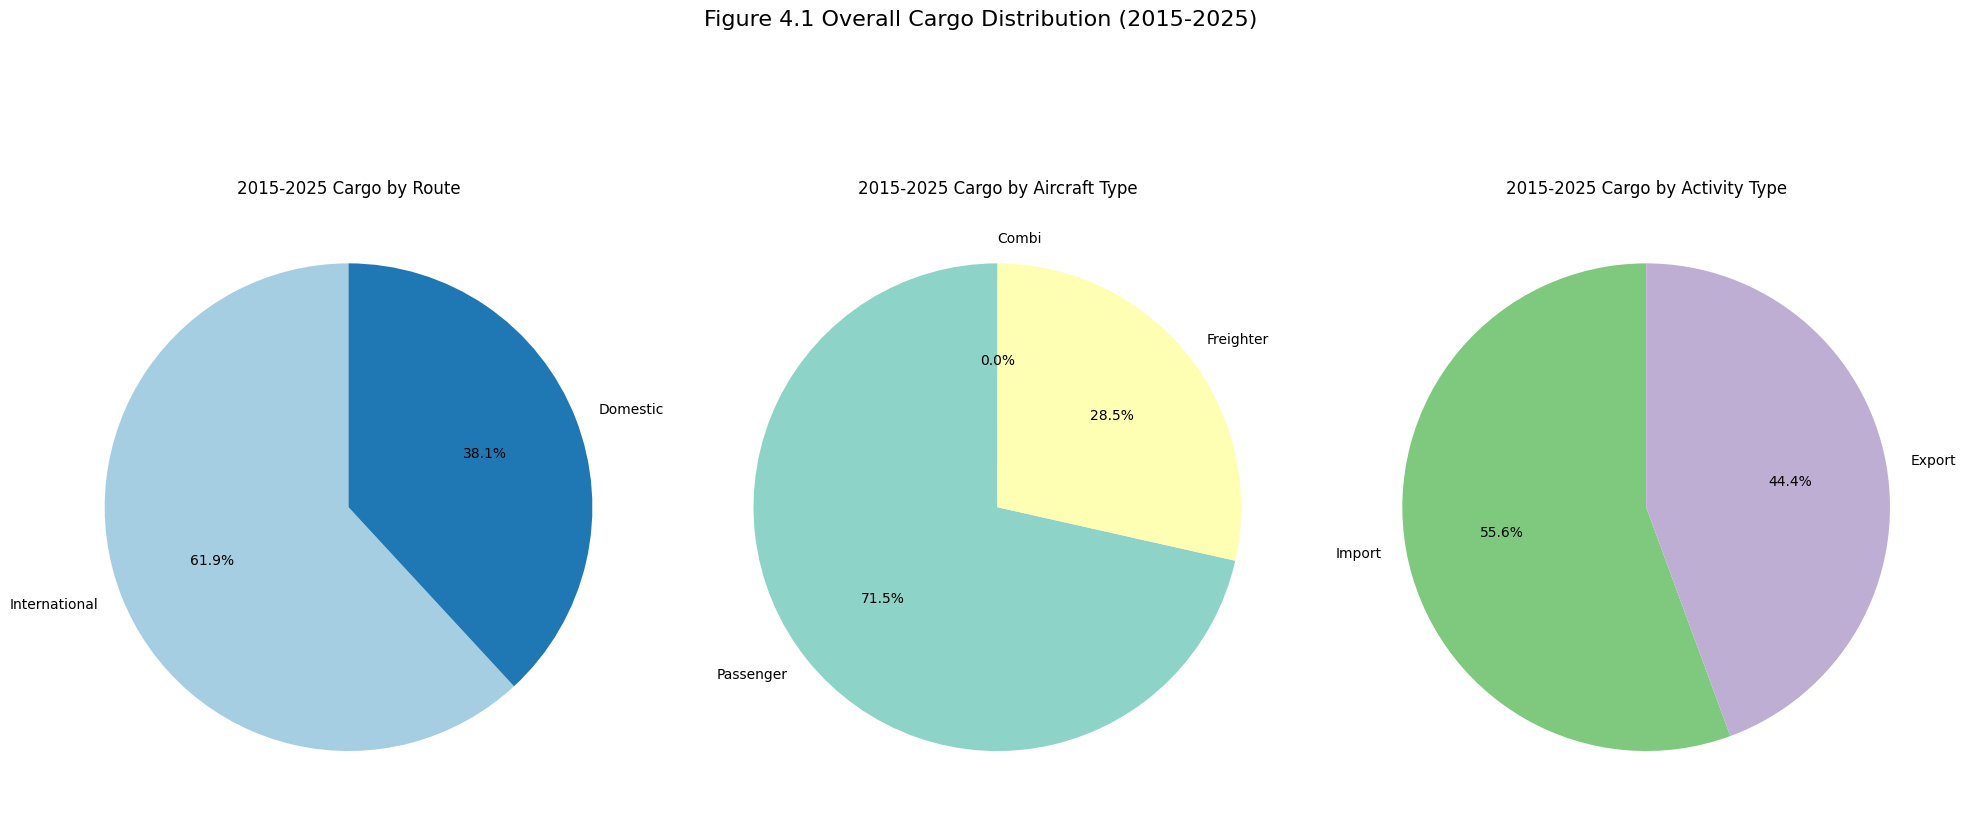

In [81]:
# Aggregate data for pie charts
geo_summary = df_merged.groupby('GEO Summary')['Cargo Metric TONS'].sum().sort_values(ascending=False)
aircraft_type = df_merged.groupby('Cargo Aircraft Type')['Cargo Metric TONS'].sum().sort_values(ascending=False)
activity_type = df_merged.groupby('Activity Type')['Cargo Metric TONS'].sum().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20,10))
fig.suptitle('Figure 4.1 Overall Cargo Distribution (2015-2025)', fontsize=16)

# Pie chart 1: GEO Summary
axes[0].pie(geo_summary, labels=geo_summary.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('2015-2025 Cargo by Route')

# Pie chart 2: Cargo Aircraft Type
axes[1].pie(aircraft_type, labels=aircraft_type.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
axes[1].set_title('2015-2025 Cargo by Aircraft Type')

# Pie chart 3: Activity Type Code
axes[2].pie(activity_type, labels=activity_type.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Accent.colors)
axes[2].set_title('2015-2025 Cargo by Activity Type')

plt.tight_layout()
plt.show()

Based on Figure 4.1,
*   **Cargo by GEO Summary**: About 62% of the cargo weight is for international flights, suggesting SFO's strong international trade routes and global orientation.
*   **Cargo by Aircraft Type**: Approximately 72% of cargo is transported via passenger aircraft belly cargo, while freighters account for about 29%. This indicates that cargo capacity is tightly linked to passenger flight schedules. Freighter operations remain crucial for high-volume or specialized shipments.
*   **Cargo by Activity Type**: 56% of the cargo volume is from import activities, suggesting SFO may serve as a major distribution hub, with inbound logistics potentially requiring more resources or optimization.

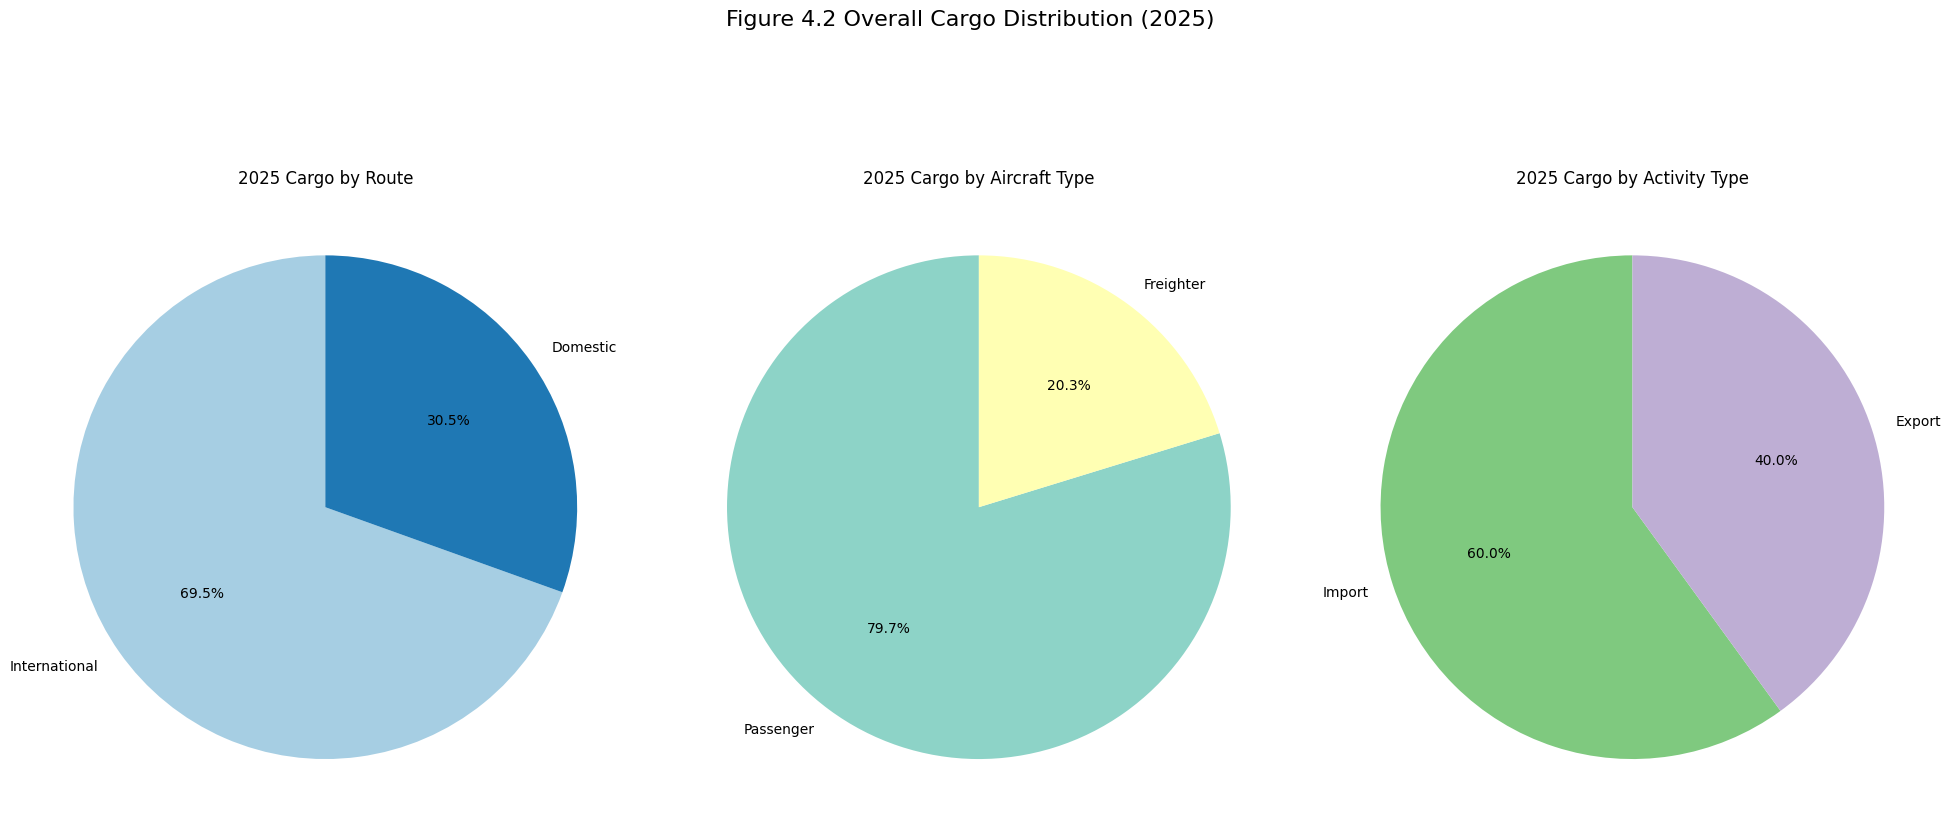

In [82]:
# Filter df_merged for the year 2025
df_2025 = df_merged[df_merged['Date'].dt.year == 2025].copy()

# Aggregate data for pie charts using df_2025
geo_summary = df_2025.groupby('GEO Summary')['Cargo Metric TONS'].sum().sort_values(ascending=False)
aircraft_type = df_2025.groupby('Cargo Aircraft Type')['Cargo Metric TONS'].sum().sort_values(ascending=False)
activity_type = df_2025.groupby('Activity Type')['Cargo Metric TONS'].sum().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20,10))
fig.suptitle('Figure 4.2 Overall Cargo Distribution (2025)', fontsize=16)

# Pie chart 1: GEO Summary
axes[0].pie(geo_summary, labels=geo_summary.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('2025 Cargo by Route')

# Pie chart 2: Cargo Aircraft Type
axes[1].pie(aircraft_type, labels=aircraft_type.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
axes[1].set_title('2025 Cargo by Aircraft Type')

# Pie chart 3: Activity Type Code
axes[2].pie(activity_type, labels=activity_type.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Accent.colors)
axes[2].set_title('2025 Cargo by Activity Type')

plt.tight_layout()
plt.show()

Figure 4.2

suggests that 2025 recorded higher percentage of cargo volume for International route, passenger aircraft type and Import activities compared to overall cargo volume recorded since 2015.

*   **Cargo by GEO Summary**: About 69.5% of the cargo weight is from international flights, suggesting SFO's strong international trade routes and global orientation.
*   **Cargo by Aircraft Type**: Approximately 79.7% of cargo is transported via passenger aircraft belly cargo, while freighters account for about 20.3%. This indicates that cargo capacity is tightly linked to passenger flight schedules, and a drop in passenger traffic could significantly impact cargo volumes. Freighter operations remain crucial for high-volume or specialized shipments.
*   **Cargo by Activity Type**: 60% of the cargo volume is from import activities, suggesting SFO may serve as a major distribution hub, with inbound logistics potentially requiring more resources or optimization.



### 4.2 Monthly Cargo Volume Trend



In [83]:
# Aggregate monthly cargo by Activity Type
cargo_trend_activity = df_merged.groupby([df_merged['Date'].dt.to_period('M'), 'Activity Type'])['Cargo Metric TONS'].sum().reset_index()
cargo_trend_activity['Date'] = cargo_trend_activity['Date'].dt.to_timestamp()
cargo_trend_activity.head()

,Date,Activity Type,Cargo Metric TONS
0,2015-01-01,Export,15744.78
1,2015-01-01,Import,17769.30
2,2015-02-01,Export,14930.32
3,2015-02-01,Import,18881.98
4,2015-03-01,Export,18769.69


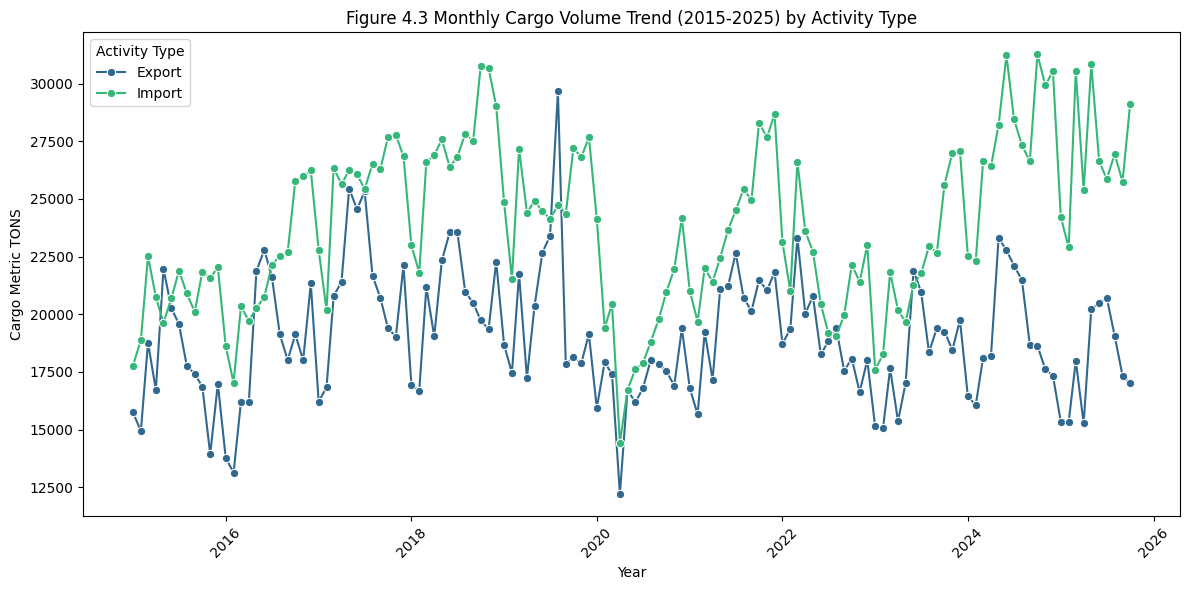

In [84]:
# Plot trend line, differentiating by Activity Type
plt.figure(figsize=(12,6))
sns.lineplot(data=cargo_trend_activity, x='Date', y='Cargo Metric TONS', hue='Activity Type', marker='o', palette='viridis')
plt.title('Figure 4.3 Monthly Cargo Volume Trend (2015-2025) by Activity Type')
plt.xlabel('Year')
plt.ylabel('Cargo Metric TONS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Figure 4.3 shows seasonal trend of cargo volume in SFO from 2015 to 2026 by activity type, Import and Export. "Import" shows higher volume as compared to "Export" and it shows consistent upward trend across the years. There are peaks in 2019 reflect strong trade cycles, and in 2024 likely tied to post-pandemic recovery.
Export volumes show more volatility with a slight downward trend towards 2025/2026 possibly due to global competition.

Although there is a spike of export volume betwwen 2019 and 2020, it shows that import volume has consistently outpaced exports since 2018, over most of the observed period, especially after the pandemic recovery.
After 2020, both import and export cargo volumes show a strong recovery and generally continued growth, indicating that SFO's air cargo operations have bounced back.




In [85]:
# Aggregate monthly cargo by Aircraft Type
cargo_trend_AC= df_merged.groupby([df_merged['Date'].dt.to_period('M'), 'Cargo Aircraft Type'])['Cargo Metric TONS'].sum().reset_index()
cargo_trend_AC['Date'] = cargo_trend_AC['Date'].dt.to_timestamp()
cargo_trend_AC.head()

,Date,Cargo Aircraft Type,Cargo Metric TONS
0,2015-01-01,Combi,93.24
1,2015-01-01,Freighter,10476.77
2,2015-01-01,Passenger,22944.07
3,2015-02-01,Combi,258.88
4,2015-02-01,Freighter,8962.74


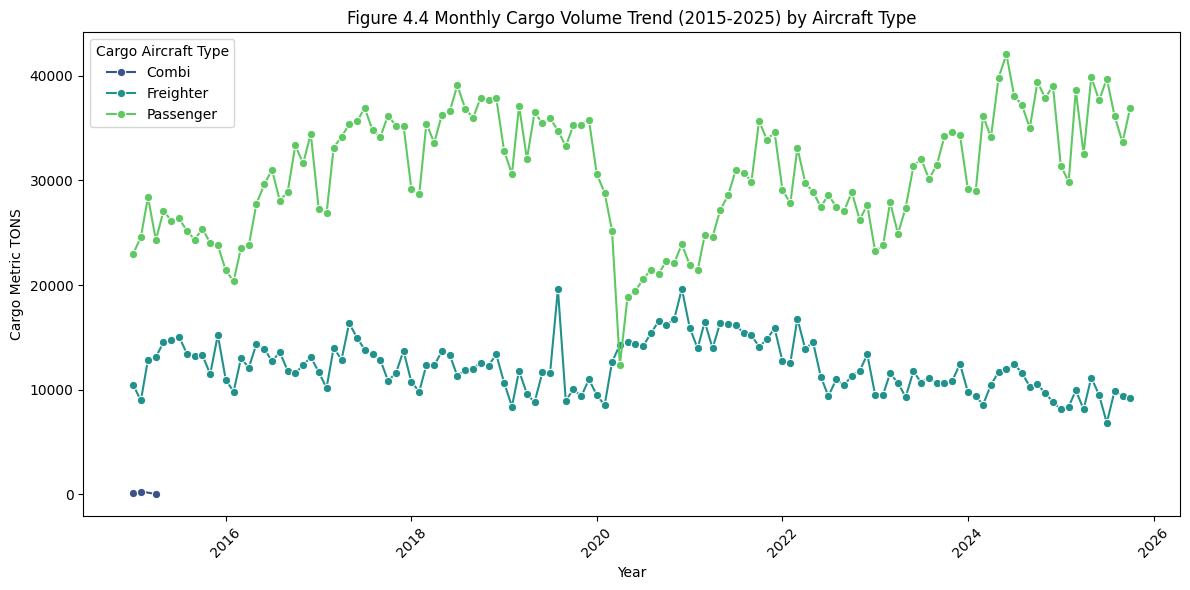

In [86]:
# Plot trend line, differentiating by Aircraft Type
plt.figure(figsize=(12,6))

sns.lineplot(data=cargo_trend_AC, x='Date', y='Cargo Metric TONS', hue='Cargo Aircraft Type', marker='o', palette='viridis')
plt.title('Figure 4.4 Monthly Cargo Volume Trend (2015-2025) by Aircraft Type')
plt.xlabel('Year')
plt.ylabel('Cargo Metric TONS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Figure 4.4 Passenger aircraft carried the majority of cargo in SFO, leveraging belly space of the aircraft, although there is a significant drop in 2020 possibly due to Covid-19 pandemic where most passenger aicrafts are grounded. Freighter aircraft became dominant during 2020-2022, compensating for grounded passenger fleets.Passenger aircraft is the dominant aircraft used for cargo movement in SFO.

(IATA, 2023) reported that cargo capacity in 2020 was approximately 10% lower than that in 2019. Throughout the aviation industry’s prolonged COVID-19 crisis, a number of airlines attempted to compensate for their steep losses in passenger revenue by transporting only cargo on their passenger aircraft (Shiyuan Zheng, 2024)

In [87]:
# Aggregate monthly cargo by Route
cargo_trend_GEO= df_merged.groupby([df_merged['Date'].dt.to_period('M'), 'GEO Summary'])['Cargo Metric TONS'].sum().reset_index()
cargo_trend_GEO['Date'] = cargo_trend_GEO['Date'].dt.to_timestamp()
cargo_trend_GEO.head()

,Date,GEO Summary,Cargo Metric TONS
0,2015-01-01,Domestic,12481.88
1,2015-01-01,International,21032.20
2,2015-02-01,Domestic,11859.49
3,2015-02-01,International,21952.81
4,2015-03-01,Domestic,15186.70


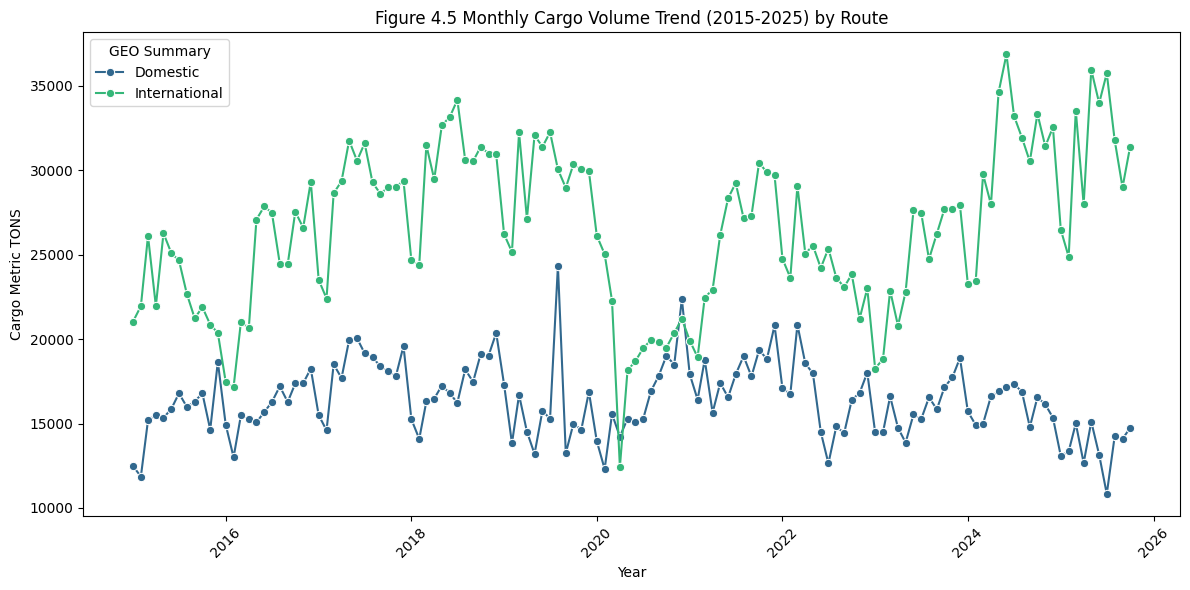

In [88]:
# Plot trend line, differentiating by Route
plt.figure(figsize=(12,6))

sns.lineplot(data=cargo_trend_GEO, x='Date', y='Cargo Metric TONS', hue='GEO Summary', marker='o', palette='viridis')
plt.title('Figure 4.5 Monthly Cargo Volume Trend (2015-2025) by Route')
plt.xlabel('Year')
plt.ylabel('Cargo Metric TONS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Figure 4.5 shows International cargo volumes dominate as compared to Domestic. Domestic cargo is more stable and consistent. There is a significant drop of International cargo volume reflecting pandemic border closures and flight reductions. Across the years, this shows that SFO act as a hub for global trade. To further analyse on which Region contributes the most, bar chart is used.

### 4.3 Total Cargo Volume by Region and Route

This bar chart visualizes the total cargo metric tons for each region, further broken down by 'Domestic' and 'International' route. This helps to understand which regions contribute to SFO's domestic and international cargo traffic.

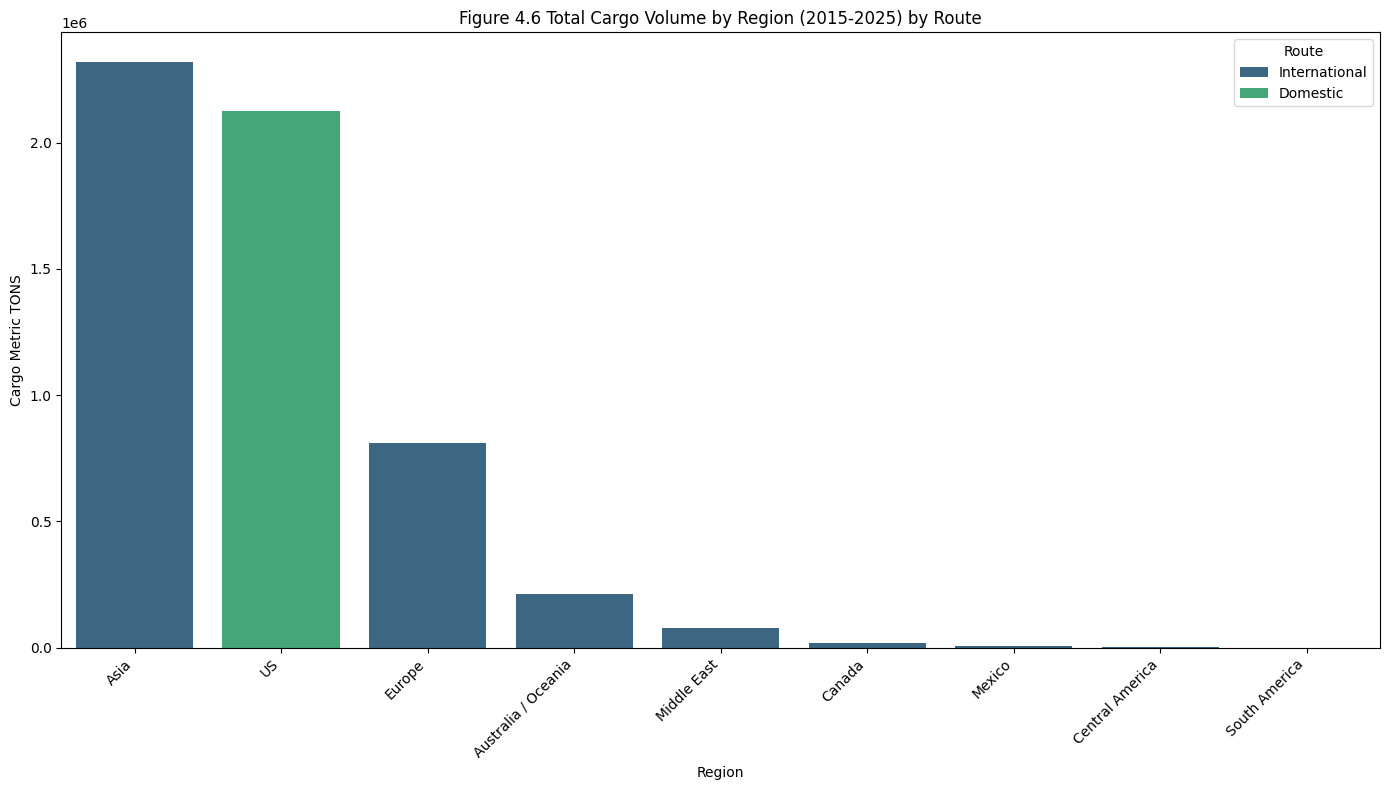

In [89]:
# Aggregate cargo by Region and GEO Summary/Route
cargo_by_region_geo = df_merged.groupby(['Region', 'GEO Summary'])['Cargo Metric TONS'].sum().reset_index()

# Sort by total cargo within each region for better visualization
# Sort regions by their total cargo first, then plot.
overall_region_total = cargo_by_region_geo.groupby('Region')['Cargo Metric TONS'].sum().sort_values(ascending=False).index
cargo_by_region_geo['Region'] = pd.Categorical(cargo_by_region_geo['Region'], categories=overall_region_total, ordered=True)
cargo_by_region_geo = cargo_by_region_geo.sort_values('Region')

# Create the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Cargo Metric TONS', hue='GEO Summary', data=cargo_by_region_geo, palette='viridis')
plt.title('Figure 4.6 Total Cargo Volume by Region (2015-2025) by Route')
plt.xlabel('Region')
plt.ylabel('Cargo Metric TONS')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Route')
plt.tight_layout()
plt.show()

Based on Figure 4.6, Asia accounts for the largest international cargo volume, exceeding 2 million metric tons over the decade, followed by Europe and Australia/Oceania. This reflects SFO’s position as a gateway for transpacific trade, especially with Asia countries. Mainland China, Hong Kong and Japan handle 60% of all cargo traffic in Asia. In 2024, Asia Pacific accounts for 34% of global CTK, the highest of any region (Cargo Facts, 2025). Besides, Cargo Facts estimates that 21% of global air cargo is linked to e-commerce, with Asia Pacific contributing 65% of global online sales. Hence this supports the trend charts in which it shows volume surges in 2024 and 2025.

### 4.4 Top 5 Airlines by GEO Summary (Domestic vs International)

These bar charts identify the top 5 airlines by cargo volume and break down their contribution to domestic versus international cargo. The normalized chart shows the proportion of domestic/international cargo for each airline, giving insights into their operational focus.

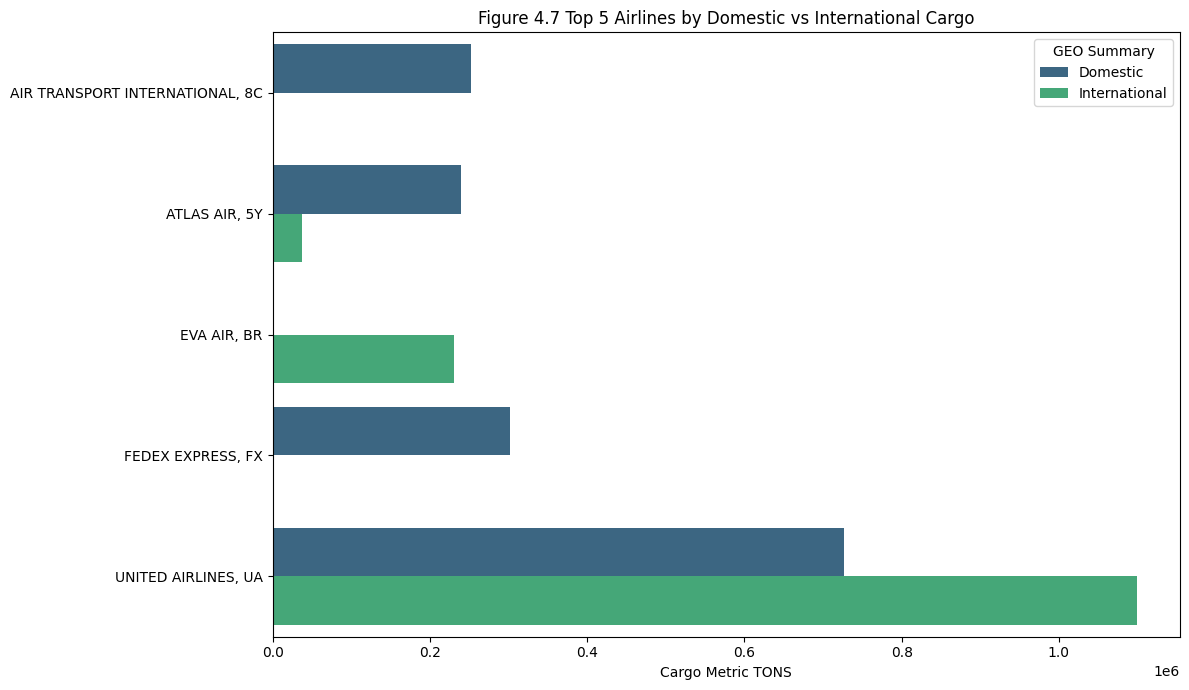

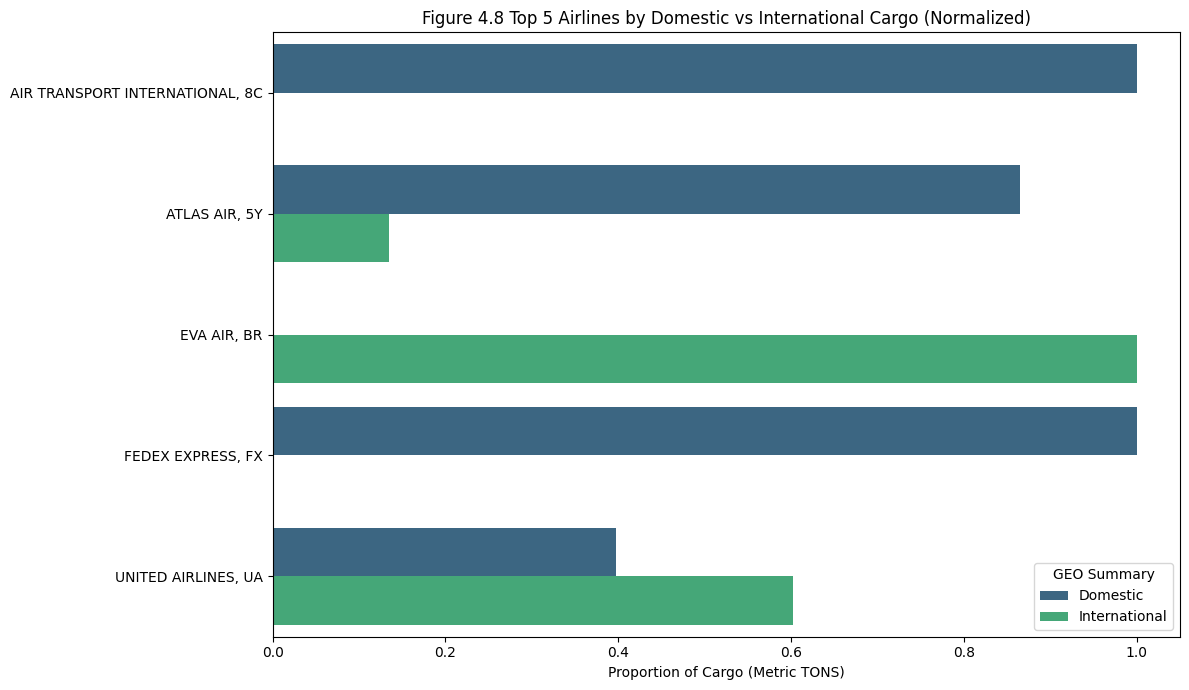

In [90]:
# Aggregate cargo by airline and GEO Summary
top_airlines_dom_int = (
    df_merged.groupby(['Airline','GEO Summary'])['Cargo Metric TONS']
      .sum()
      .reset_index()
)

# Get top 5 airlines overall
top5_airlines = (
    df_merged.groupby('Airline')['Cargo Metric TONS']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .index
)

# Filter only top 5 airlines
top_airlines_dom_int = top_airlines_dom_int[top_airlines_dom_int['Airline'].isin(top5_airlines)]

# Plot grouped bar chart (Absolute Values)
plt.figure(figsize=(12,7))
sns.barplot(data=top_airlines_dom_int, y='Airline', x='Cargo Metric TONS', hue='GEO Summary', palette='viridis')
plt.title('Figure 4.7 Top 5 Airlines by Domestic vs International Cargo')
plt.xlabel('Cargo Metric TONS')
plt.ylabel('')
plt.legend(title='GEO Summary')
plt.tight_layout()
plt.show()

# Calculate total cargo for each airline to normalize
total_cargo_per_airline = top_airlines_dom_int.groupby('Airline')['Cargo Metric TONS'].sum()

# Normalize the 'Cargo Metric TONS' by dividing by the total for each airline
top_airlines_dom_int['Normalized Cargo'] = top_airlines_dom_int.apply(
    lambda row: row['Cargo Metric TONS'] / total_cargo_per_airline[row['Airline']],
    axis=1
)

# Plot grouped bar chart with normalized data
plt.figure(figsize=(12,7))
sns.barplot(data=top_airlines_dom_int, y='Airline', x='Normalized Cargo', hue='GEO Summary', palette='viridis')
plt.title('Figure 4.8 Top 5 Airlines by Domestic vs International Cargo (Normalized)')
plt.xlabel('Proportion of Cargo (Metric TONS)')
plt.ylabel('')
plt.legend(title='GEO Summary')
plt.tight_layout()
plt.show()

Based on Figure 4.7 (absolute) and Figure 4.8 (normalized),



*   **UNITED AIRLINES, UA** has the highest total cargo volume, with strong presence in both domestic and international segments. It operates extensive belly cargo capacity on passenger flights and connects SFO to major hubs across Asia, Europe, and the U.S. In 2024, UA processed 157 million kg of cargo at SFO: 90M kg in transfers, 24M kg exports, and 43M kg imports (unitedcargo, 2025).

*   **FEDEX EXPRESS, FX** is the second-highest domestic cargo volume, reflecting its role in express logistics and regional distribution. It operates dedicated freighters, including Boeing 777 and 767 aircraft, optimized for high-frequency U.S. routes.

*   **ATLAS AIR, 5Y** has atrong domestic cargo volume, with moderate international operations.

*   **AIR TRANSPORT INTERNATIONAL, 8C** focused on domestic cargo with minimal international volume. It operates charter and express cargo services, and supports specialized logistics rather than international trade.
*   **EVA AIR, BR** primarily engaged in international cargo, with no domestic operations. It connects SFO to Taiwan and other Asia Pacific hubs via freighters.

### 4.5 Top 5 Airlines by Activity Type (Import vs Export)

These bar charts show the top 5 airlines by cargo volume and differentiate between import and export activities. The normalized chart illustrates the proportion of import/export cargo for each airline, revealing their specialization in inbound or outbound logistics.

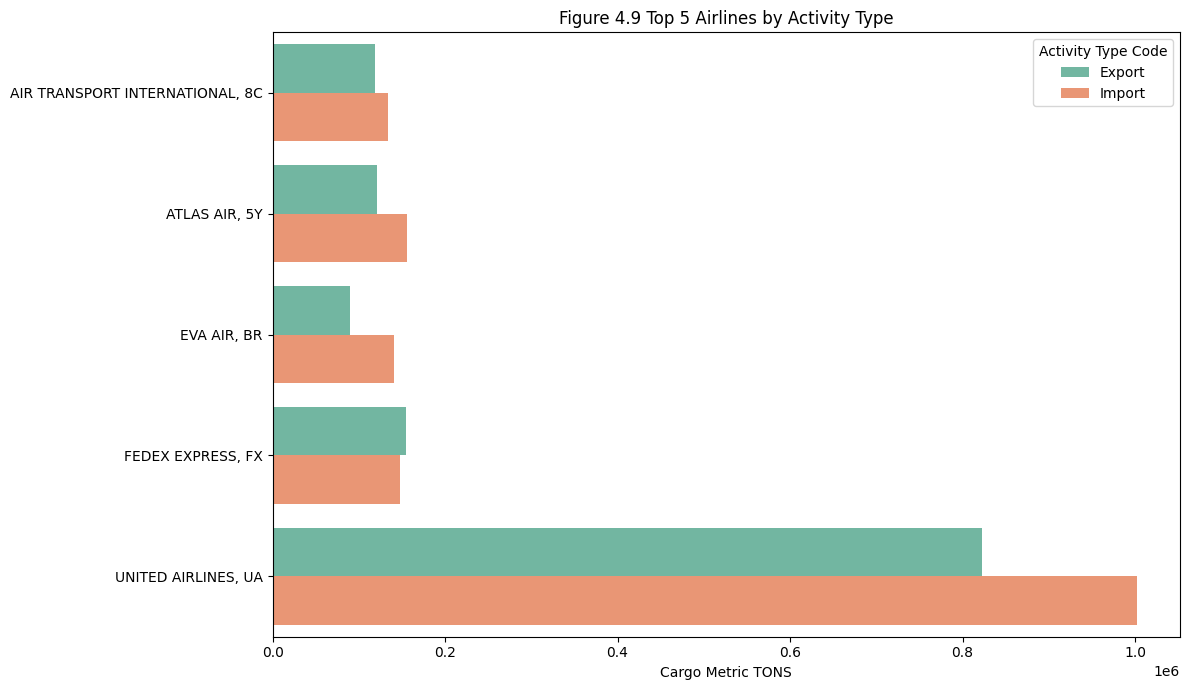

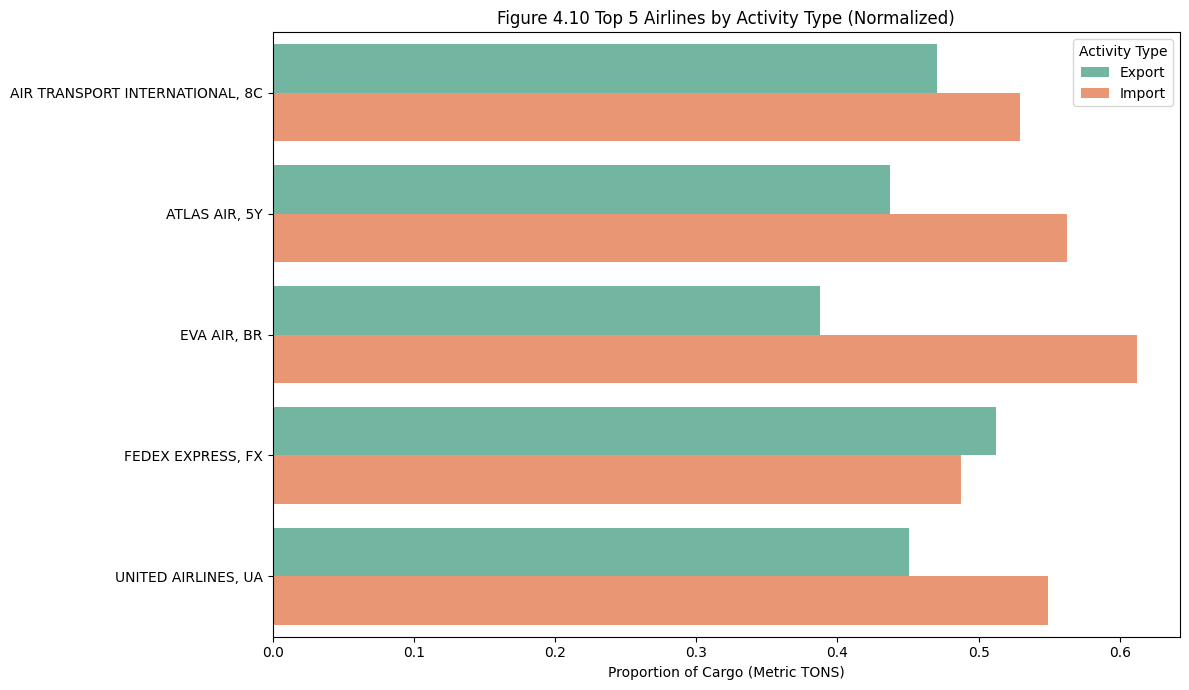

In [91]:
# Aggregate cargo by airline and activity type
top_airlines_activity = (
    df_merged.groupby(['Airline','Activity Type'])['Cargo Metric TONS']
      .sum()
      .reset_index()
)

# Get top 5 airlines overall
top5_airlines = (
    df_merged.groupby('Airline')['Cargo Metric TONS']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .index
)

# Filter only top 5 airlines
top_airlines_activity = top_airlines_activity[top_airlines_activity['Airline'].isin(top5_airlines)]

# Plot grouped bar chart (Absolute Values)
plt.figure(figsize=(12,7))
sns.barplot(data=top_airlines_activity, y='Airline', x='Cargo Metric TONS', hue='Activity Type', palette='Set2')
plt.title('Figure 4.9 Top 5 Airlines by Activity Type')
plt.xlabel('Cargo Metric TONS')
plt.ylabel('')
plt.legend(title='Activity Type Code')
plt.tight_layout()
plt.show()

# Calculate total cargo for each airline to normalize
total_cargo_per_airline_activity = top_airlines_activity.groupby('Airline')['Cargo Metric TONS'].sum()

# Normalize the 'Cargo Metric TONS' by dividing by the total for each airline
top_airlines_activity['Normalized Cargo'] = top_airlines_activity.apply(
    lambda row: row['Cargo Metric TONS'] / total_cargo_per_airline_activity[row['Airline']],
    axis=1
)

# Plot grouped bar chart with normalized data
plt.figure(figsize=(12,7))
sns.barplot(data=top_airlines_activity, y='Airline', x='Normalized Cargo', hue='Activity Type', palette='Set2')
plt.title('Figure 4.10 Top 5 Airlines by Activity Type (Normalized)')
plt.xlabel('Proportion of Cargo (Metric TONS)')
plt.ylabel('')
plt.legend(title='Activity Type')
plt.tight_layout()
plt.show()

Based on Figure 4.9 (absolute) and Figure 4.10 (normalized),


*   **UNITED AIRLINES, UA** dominates both import and export cargo by a significant margin. This highlights its extensive network and substantial belly cargo capacity, making it a primary carrier for both inbound and outbound logistics at SFO. While having the highest absolute volumes, the normalized chart reveals a relatively balanced profile between import and export, though imports slightly outweigh exports. This signifies its comprehensive role in connecting SFO to global markets in both directions.

*   **FEDEX EXPRESS, FX** shows a very strong presence, particularly in import cargo. While its export volume is also considerable, the absolute numbers suggest a slightly higher focus on bringing goods into SFO. hile having the highest absolute volumes, the normalized chart reveals a relatively balanced profile between import and export, though export slightly outweigh import.

*   **ATLAS AIR, 5Y** also handles substantial volumes for both import and export, with import volumes being notably higher than export. This is typical for a freighter operator that might be bringing in goods to a major distribution hub. The normalized chart displays a clear specialization in imports, with a much larger portion of its total cargo being inbound. This suggests a strategic focus on supporting the demand for goods entering the region through SFO.

*   **AIR TRANSPORT INTERNATIONAL, 8C**: Similarly, this airline exhibits a stronger focus on imports, with inbound cargo making up a greater proportion of its overall activity.


*   **EVA AIR, BR** primarily engaged in international cargo, EVA Air shows a considerable volume, with import cargo significantly higher than export. This aligns with its role as a key contributor from Asia, bringing goods into SFO.

### 4.6 Top 5 Airlines Performance (Last 5 Years)

This bar chart visualizes the cargo volume for the top 5 airlines over the past five years (2021-2025). This provides a clearer understanding of their individual performance and contribution to SFO's cargo operations during this recent period.

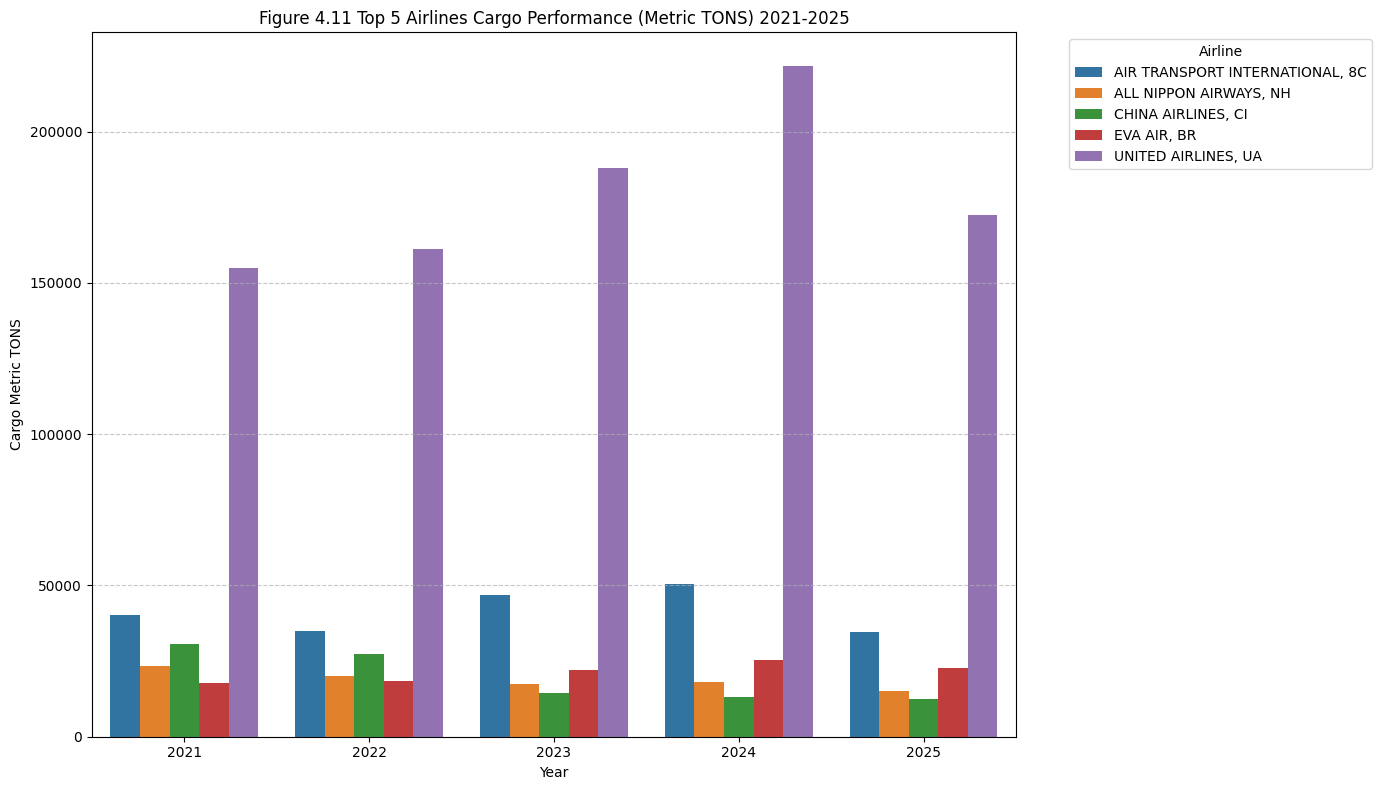

In [92]:
import datetime

# Get the current year from the latest date in the dataset
max_year = df_merged['Date'].max().year

# Filter data for the last 5 full years (e.g., if max_year is 2025, then 2021-2025)
start_year_for_5_years = max_year - 4
df_last_5_years = df_merged[df_merged['Date'].dt.year >= start_year_for_5_years].copy()

# Aggregate cargo by airline for the last 5 years to find the top 5
top5_airlines_last_5_years = (
    df_last_5_years.groupby('Airline')['Cargo Metric TONS']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data for only these top 5 airlines
df_top5_recent = df_last_5_years[df_last_5_years['Airline'].isin(top5_airlines_last_5_years)]

# Aggregate by Airline and Year to get annual performance for these top airlines
annual_performance_top5 = (
    df_top5_recent.groupby(['Airline', df_top5_recent['Date'].dt.year])['Cargo Metric TONS']
    .sum()
    .reset_index()
)
annual_performance_top5.rename(columns={'Date': 'Year'}, inplace=True)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=annual_performance_top5, x='Year', y='Cargo Metric TONS', hue='Airline', palette='tab10')
plt.title(f'Figure 4.11 Top 5 Airlines Cargo Performance (Metric TONS) {start_year_for_5_years}-{max_year}')
plt.xlabel('Year')
plt.ylabel('Cargo Metric TONS')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on Figure 4.11,


*   **UNITED AIRLINES, UA** Dominates cargo volume every year, with a peak in 2024. It operates extensive belly cargo capacity on passenger flights and connects SFO to major domestic and international hubs. In 2024, UA processed over 200000 metric tons of cargo at SFO, including exports and imports.This reflects UA’s dual role in domestic logistics and global trade.

*   **AIR TRANSPORT INTERNATIONAL, 8C** shows strong and consistent cargo volumes, especially in domestic operations. It specializes in charter and express cargo, hence it often acts for time-sensitive shipments.
*   **EVA AIR, BR** shows a steady cargo volumes, reflecting its specialization in transpacific freight.


*   **China Airlines, CI** shows some drop over the years although with stable cargo volumes, focused on Asia–U.S. trade lanes. It benefits from growing e-commerce and electronics trade between China and the U.S.

*   **All Nippon Airways,NH** shows moderate volume year-over-year although lower cargo columes compared to others.

### 4.7 Recent Years Monthly Comparison (2024 vs 2025)



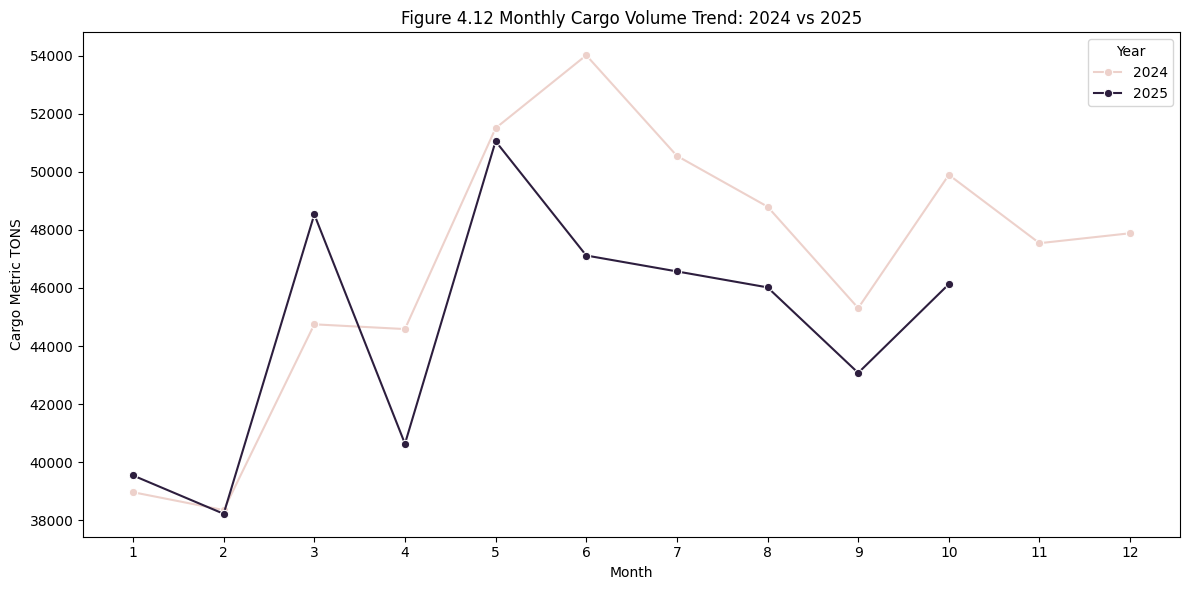

In [93]:
# Ensure Date column is datetime and extract Year and Month
df_merged['Year'] = df_merged['Date'].dt.year
df_merged['Month'] = df_merged['Date'].dt.month

# Aggregate monthly cargo
monthly_cargo = (
    df_merged.groupby(['Year','Month'])['Cargo Metric TONS']
      .sum()
      .reset_index()
)

# Filter only 2024 and 2025 for comparison
monthly_cargo_24_25 = monthly_cargo[monthly_cargo['Year'].isin([2024, 2025])]

# Plot trend line
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_cargo_24_25,
    x='Month',
    y='Cargo Metric TONS',
    hue='Year',
    marker='o'
)
plt.title('Figure 4.12 Monthly Cargo Volume Trend: 2024 vs 2025')
plt.xlabel('Month')
plt.ylabel('Cargo Metric TONS')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

Figure 4.12 compares overall monthly cargo volumes for 2024 and 2025. It shows that 2024 generally had higher volumes compared to 2025, although with similar seasonal patterns. March and May 2025 show a spike in volume, indicating stronger demand in Spring. There is a spike in June 2024 while 2025 spikes in May, showing a shift in seasonal cargo surges. July onwards show a similar pattern in 2024 and 2025 but with lower volume in 2025.

### 4.8 Monthly Change in Cargo (2025 vs 2024)

This bar chart visualizes the month-over-month difference in cargo volume between 2025 and 2024, highlighting periods of growth or decline.

/tmp/ipython-input-3063979934.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot.index, y=pivot['Delta'], palette='coolwarm')


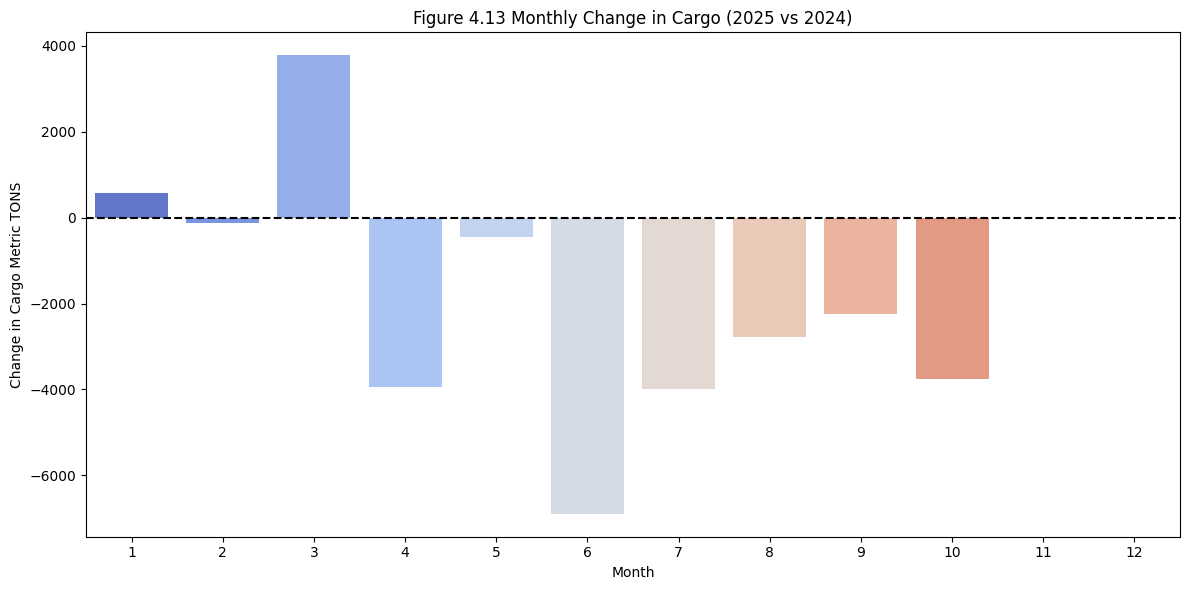

In [94]:
# Pivot to compare directly
pivot = monthly_cargo_24_25.pivot(index='Month', columns='Year', values='Cargo Metric TONS')
pivot['Delta'] = pivot[2025] - pivot[2024]

plt.figure(figsize=(12,6))
sns.barplot(x=pivot.index, y=pivot['Delta'], palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Figure 4.13 Monthly Change in Cargo (2025 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Change in Cargo Metric TONS')
plt.tight_layout()
plt.show()

Figure 4.13 shows the monthly change in cargo volume at San Francisco International Airport (SFO) between 2025 and 2024. It complements the previous line chart by quantifying the difference month-by-month, highlighting where gains or losses occurred. Together, these charts reveal seasonal shifts, demand surges, and operational implications. Cargo volume surged in March 2025 over March 2024, confirming an upward trend seen in the previous line chart. Meanwhile cargo volume dropped significantly in June 2025 compared to June 2024. This shows a shift in peak seasonality, as previous chart shows 2024 peaks in June while 2025 peaks earlier in May.

## 5.0 Key Findings


*   **Cargo Distribution**: SFO is primarily an international gateway, with Asia as its largest partner. Over 70% of cargo moves in passenger aircraft bellies. This shows most airlines have converted passenger aircraft for cargo transportation especially post-pandemic. Imports consistently outweigh exports, positioning SFO as a major inbound hub.

*   **Monthly Trends**: Cargo volumes have grown steadily since 2015, with a sharp dip in 2020 due to COVID-19. Freighters sustained supply chains during this period. Recovery post-2020 has been strong, though 2025 shows earlier seasonal peaks (March/May) compared to 2024 (June).


*   **Airline Performance**: United Airlines leads across domestic and international cargo. FedEx dominates domestic freight, while Atlas Air and Air Transport International specialize in imports. EVA Air focuses on international flows, especially from Asia.



## 6.0 Conclusion
### Limitations



*   There is no revenue or cost data limits profitability or sales growth analysis
*   Air Cargo volume or demand are mainly affected by external factors such as GDP, trade policy and geopolitics, such factors are not included.
*   Lack of information such as aircraft model, cargo capacity or maximum cargo weight by aircraft, and frequency of the flights. These informations are essential for airport and airline stakeholders for manpower and operation planning.

### Recommendations


#### For SFO Authorities
*   SFO airport authorities should prioritize and enchance in import handling infrastructure as well as contingency planning for passenger flight disruptions, given the high reliance on belly cargo and import dominance.
*   Build stronger partnerships with Asia-focused carriers.

*   EVA Air, BR restructures its cargo operations by consolidating its cargo services under a new entity Evergreen Airline Services Corp. (EASC) to align with the evolving demands of global supply chains. Airport authorities may consider to plan or prepare more allocations for BR
*   Explore opportunities to integrate external economic data and real-time operational data into analytical frameworks to improve strategic planning.


#### For Airlines
*   Diversify cargo strategies beyond the capacity and adjust capacity proactively to align with shifting seasonal peaks.
*   Strengthen import logistics and distribution networks & collaborate with SFO to streamlime transfers and for smooth operations.

#### For Logistics Stakeholders
*   Diversify cargo strategies beyond the capacity and adjust capacity proactively to align with shifting seasonal peaks.
*   Strengthen import logistics and distribution networks & collaborate with SFO to streamlime transfers.
*   Adapt to changing seasonality with flexible inventory and manpower





## 7.0 References

*   (2010). Retrieved from DataSF | Open Data Portal: https://data.sfgov.org/api/views/u397-j8nr/files/c4eebc3d-88e2-4647-9c56-b3a8f60473f7?download=true&filename=DataSF%20Data%20Dictionary%20for%20Air%20Traffic%20CARGO%20Statistics.pdf

*   (2023). Retrieved from IATA: https://www.iata.org/en/iata-repository/publications/economic-reports/uneven-recovery-trends-in-air-cargo-traffic-and-capacity/?utm_source=copilot.com
Cargo Facts .

*   Cargo Facts . (2025). Retrieved from Cargo Facts : https://cargofactsevents.com/wp-content/uploads/2025/03/2025_03_24_CF_Asia_Presentation_fd-1.pdf?utm_source=copilot.com

*   Nova Express Shipping. (2025). Retrieved from novexshipping: https://www.novexshipping.com/news/5027/top-25-cargo-airlines-of-2025-global-leaders-in-air-freight?utm_source=copilot.com

*   Shiyuan Zheng, K. W. (2024). Converting passenger aircraft into cargo planes under volatile market demand. Transportation Research Part A: Policy and Practice.

*   unitedcargo. (2025). Retrieved from unitedcargo: https://www.unitedcargo.com/en/us/learn/news/newsfeed/2025-05-15-SFO-Spotlight.html?utm_source=copilot.com


